## Historical Data For Bike Sharing in London (2015-2016)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
#Dataset - "London Bike Sharing Dataset" available from https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset
data = pd.read_csv("london_merged.csv")

### Subject - Popularity of bike sharing in European metropolis using data from London
Part 1 - Overview of the data  
Part 2 - Usage in different seasons  
Part 3 - Overall usage of bike sharing as means of transport (daily spikes, monthly usage)  
### Part 1

In [4]:
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
#timestamp - timestamp field for grouping the data, cnt - count of new hourly bike shares
#t1 and t2 - temperature and 'real' temperature, hum - humidity, wind_speed - in km/h
#weather_code - 1 = Clear  2 = Scattered clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/Light rain 10 = Thunderstorm 26 = Snowfall 94 = Freezing Fog
#is_holiday - if given day is a holiday, #is_weekend - if given day is on a weekend
#season - Meteorological seasons: 0 - spring ; 1 - summer; 2 - fall; 3 - winter

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


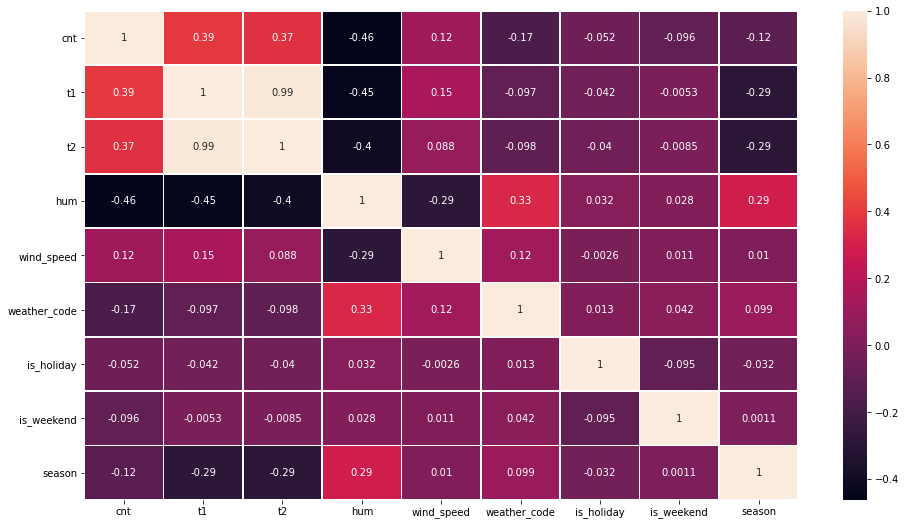

In [7]:
fig, ax = plt.subplots(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidths=.8, ax=ax);

Simple correlation matrix using a heatmap, even if we don't use all the variables

### Part 2

In [9]:
#Before going further, timestamp data should be divided into month, day and hour to simplify the process
#Data consists of period from 1/1/2015 to 31/12/2016 

In [11]:
data['timestamp'] = data['timestamp'] .apply(lambda x :datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
data['year'] = data['timestamp'].apply(lambda x : str(x).split(' ')[0].split('-')[0])
data['month'] = data['timestamp'].apply(lambda x : str(x).split(' ')[0].split('-')[1])
data['day'] = data['timestamp'].apply(lambda x : str(x).split(' ')[0].split('-')[2])
data['hour'] = data['timestamp'].apply(lambda x : str(x).split(' ')[1].split(':')[0])

In [12]:
winter_count = (data['season'] == 3).sum()
fall_count = (data['season'] == 2).sum()
summer_count = (data['season'] == 1).sum()
spring_count = (data['season'] == 0).sum()

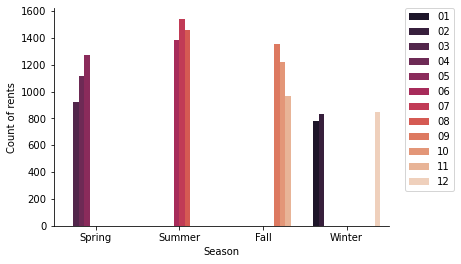

In [13]:
seasons = sns.barplot(data = data,x = "season", y = "cnt", hue = 'month', palette = "rocket", ci=None)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.ylabel('Count of rents')
plt.xlabel('Season')

plt.xticks([0, 1, 2, 3],['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams["figure.figsize"] = (15,5)
plt.show(seasons);

The plot shows the usage of bike sharing, depending on the time of year  
As expected, bike sharing is most popular in summer months, and least used during winter  
Weather conditions always play a factor, as bicycles provide no protection from weather elements

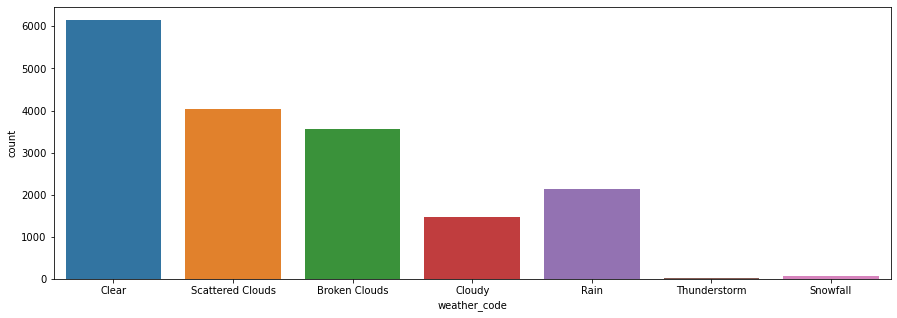

In [26]:
cat = ['weather_code']

for i in cat:
  sns.countplot(x = i, data = data)
plt.xticks([0, 1, 2, 3, 4, 5, 6],['Clear', 'Scattered Clouds', 'Broken Clouds', 'Cloudy', 'Rain', 'Thunderstorm', 'Snowfall']);

### Part 3

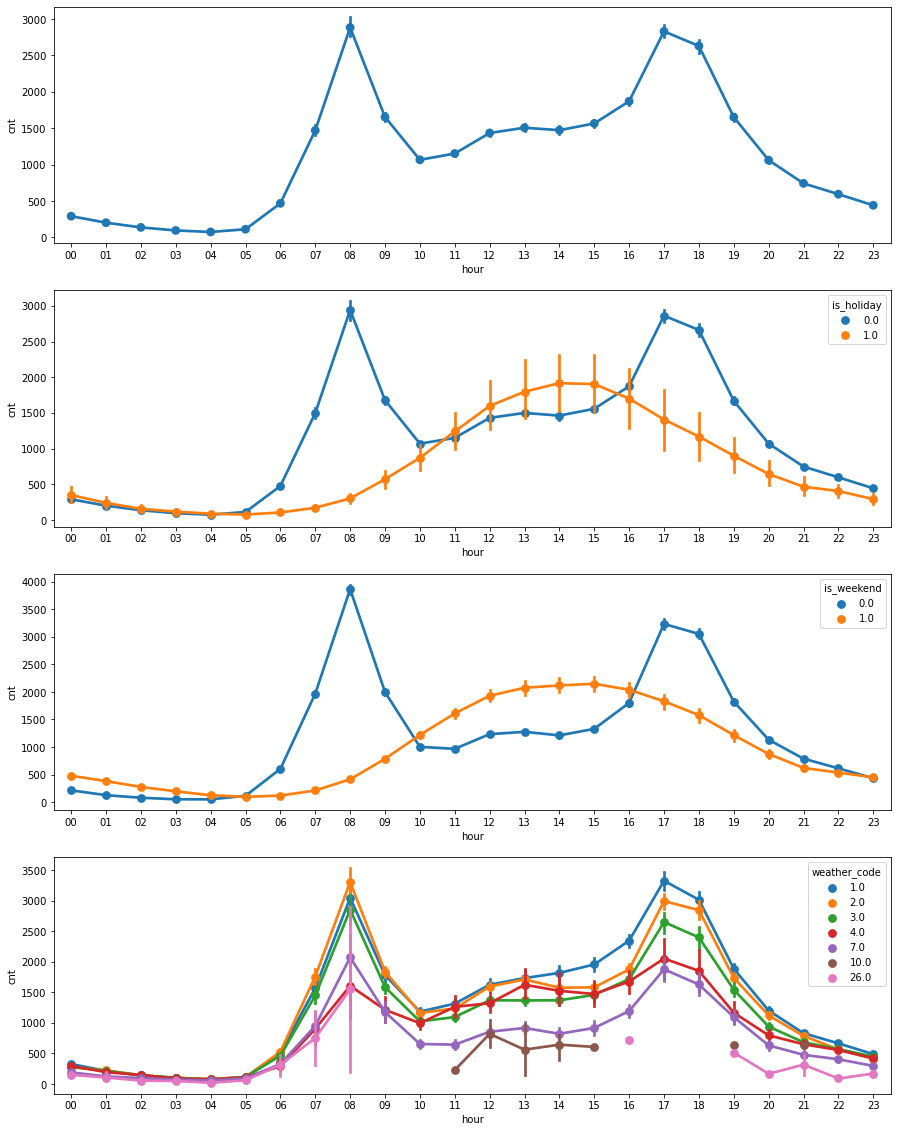

In [16]:
fig,(ax1, ax2, ax3, ax4)= plt.subplots(nrows = 4)
fig.set_size_inches(15,20)

sns.pointplot(data=data, x='hour', y='cnt', ax=ax1)
sns.pointplot(data=data, x='hour', y='cnt', hue='is_holiday', ax=ax2)
sns.pointplot(data=data, x='hour', y='cnt', hue='is_weekend', ax=ax3)
sns.pointplot(data=data, x='hour', y='cnt', hue='weather_code',ax=ax4)

Plot 1 shows must popular average hours for usage - early morning and late afternoon show bike sharing is
popular as means of transport for getting to and from work  

Plots 2 and 3 show similar results for weekends and holidays, where bike sharing is most popular in the afternoon,
possibly during leisure time outside  

Plot 4 shows usage in different weather conditions, worse weather conditions automatically lower the average use
Total count shown in one of the plots above

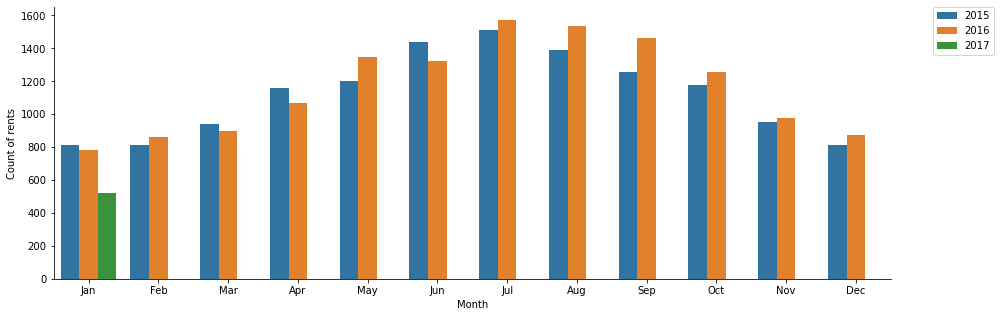

In [18]:
monthly = sns.barplot(data = data,x = "month", y = "cnt", hue = 'year', palette = "tab10", ci=None)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.ylabel('Count of rents')
plt.xlabel('Month')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams["figure.figsize"] = (15,5)
plt.show(monthly);

Difference between popularity in the early part of 2016, compared to 2015, as well as increase in the second part
may suggest that weather may have played a factor  
This is shown on the graph below, where early part of the year was warmer in 2015, than same period of 2016

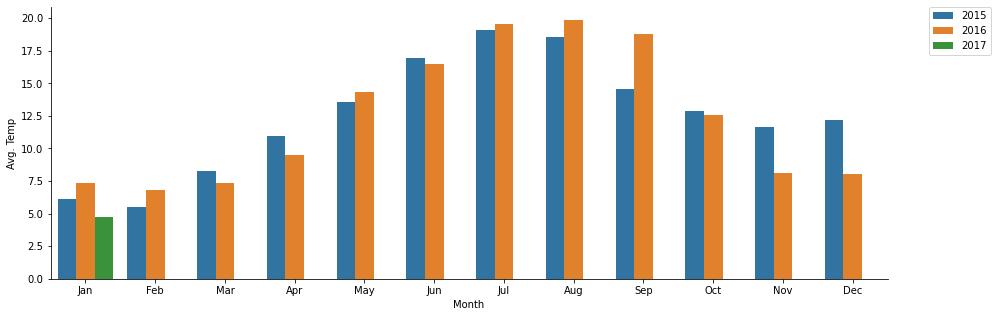

In [20]:
temp = sns.barplot(data = data,x = "month", y = "t1", hue = 'year', palette = "tab10", ci=None)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.ylabel('Avg. Temp')
plt.xlabel('Month')

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams["figure.figsize"] = (15,5)
plt.show(temp);

Text(0, 0.5, 'Rides per day')

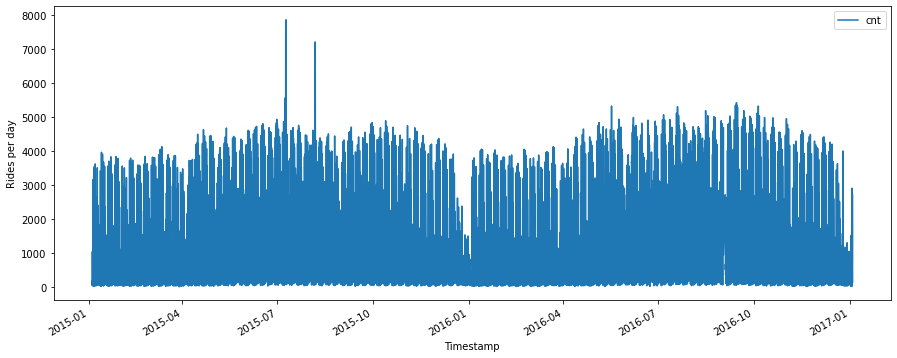

In [21]:
plot_data = data[['cnt', 'day', 'timestamp']]
ax = plot_data.groupby('timestamp').sum().plot(figsize=(15,6))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Rides per day")

Overall popularity neither increases nor decreases significantly over time